# Text Processing just for Trump Data and creating word embeddings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import gensim.models

from sklearn.manifold import TSNE

plt.style.use('ggplot')

In [ ]:
def last_preprocess(table_name):
    
    table_name = table_name[table_name['body'].notnull()]
    
    # Turning each comment into a vector of words
    table_name['body'] = table_name['body'].apply(lambda x: x.split(' '))

    # Removing single letter words for this context
    table_name['body'] = table_name['body'].apply(lambda x: [word for word in x if len(word)>1])
    
    return table_name

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files = os.listdir('/content/drive/MyDrive')[-7:-1]

In [ ]:
random_dict = {}

for i in range(len(files)):
  random_dict[f'trump{i}'] = last_preprocess(pd.read_csv(f'/content/drive/MyDrive/{files[i]}', index_col = 'Unnamed: 0'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
trump_df = pd.concat([random_dict['trump0'], random_dict['trump1'], random_dict['trump2'],
                        random_dict['trump3'], random_dict['trump4'], random_dict['trump5']])

trump_df

,body
0,"[he, be, so, base, it, even, rub, off, on, the..."
1,"[you, can, get, good, shot, of, all, or, most,..."
2,"[this, message, be, bring, to, you, by, the, c..."
4,"[actually, they, have, over, two, billion, fol..."
5,"[poltics, be, always, such, shitshow, anyway, ..."
...,...
1584986,"[would, if, could]"
1584987,"[they, should, ask, the, nyt, apparently, that..."
1584988,"[be, still, choke, that, chaffetz, block, me, ..."
1584989,"[death, by, natural, cause, barbell, no, doubt]"


In [ ]:
trump_cbow = gensim.models.Word2Vec(sentences=trump_df['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 0)

trump_skipgram = gensim.models.Word2Vec(sentences=trump_df['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 1)

pickle.dump(trump_cbow, open("trump_cbow.pkl", "wb"), 
            protocol=pickle.HIGHEST_PROTOCOL)

pickle.dump(trump_skipgram, open("trump_sg.pkl", "wb"), 
            protocol=pickle.HIGHEST_PROTOCOL)

print("done")

done


In [ ]:
trump_cbow = pickle.load(open('trump_cbow.pkl', 'rb'))
trump_sg = pickle.load(open('trump_sg.pkl', 'rb'))

In [ ]:
words = ['word', 'freedom', 'trust', 'radical', 'democracy', 'privacy', 'safety',
         'right','police','healthcare','government','restriction','accountability',
         'correct','political','cancel','culture','constitution','conventional',
         'authoritarian','tradition','leadership']

In [ ]:
# Does not use the word media

vocab_trump_cbow = {}
vocab_trump_sg = {}

for _ in words:
    vocab_trump_cbow[_] = trump_cbow.most_similar(_)
    vocab_trump_cg[_] = trump_sg.most_similar(_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
all_words = {}

for i in words:
  all_words[f'{i}'] = [vocab_trump_cbow[i][j][0] for j in range(len(vocab_trump_cbow[i]))]

all_words

In [ ]:
vocab_df = pd.DataFrame(data = all_words)
vocab_df

,word,freedom,trust,radical,democracy,privacy,safety,right,police,healthcare,government,restriction,accountability,correct,political,cancel,culture,constitution,conventional,authoritarian,tradition,leadership
0,phrase,liberty,believe,extremist,republic,anonymity,saftey,now,officer,medicare,govt,restricting,ethic,incorrect,politcal,cancelled,multiculturalism,consitution,dogfight,totalitarian,judeo,leader
1,meaning,freedoms,unknow,fundamentalist,tyranny,personal,protection,winger,policeman,nhs,goverment,regulation,responsibility,misunderstand,poltical,cancellation,cultural,fourteenth,capability,statist,observance,position
2,quotation,individuality,belive,islamist,dictatorship,stripping,impinge,rightalt,cop,socialized,governement,restrict,transparency,wrong,politicial,announce,western,framer,deterrence,illiberal,bastardisation,cabel
3,phrasing,feee,trustworthy,extremism,sovereignty,pii,service,infringes,pd,medicaid,governemt,limitation,competence,misread,correctness,tix,subculture,amendments,multirole,collectivist,piety,administration
4,adjectives,liberties,convince,islamic,pluralist,eula,security,roght,lapd,health,goverments,provision,ethical,misinterpret,poltiical,subscription,bastardisation,amendment,firepower,authoritarians,judaic,transition
5,verbiage,free,tell,islamism,autocracy,greycoder,wellbeing,adays,cpd,childcare,governmental,prohibition,integrity,clarify,ideological,canceling,passivity,constitutional,weaponry,fascistic,liturgy,statesmanship
6,vocabulary,autonomy,doubt,extremists,soverignty,impinge,personal,inalienable,enforcement,aca,govenrment,stringent,oversight,eludes,politcial,cancelling,society,enshrine,geopolitically,autocracy,heritage,appointee
7,declarative,persuit,confide,islam,pasok,safety,privacy,riiiight,cops,socialize,govts,prioritization,boundary,grammatically,politics,canceled,homogeny,preamble,warheads,authoritarianism,traditional,competence
8,mincing,sovereignty,utahns,radicalism,indepence,opennic,recognizance,liberties,firefighter,obamacare,bureaucracy,gca,obligation,gramatically,expediency,expire,homogeneity,uphold,fission,neoliberal,chivalry,functionary
9,idiom,sacredness,peitions,islamics,tyrany,tutanota,property,freedoms,guardsman,insurance,federal,rollback,governmental,declarative,polarise,postpone,cultureless,constitutionally,counterinsurgency,dictatorial,catholicism,governance


In [ ]:
def similar_df(cbow_model, sg_model, word_list):

  import pandas as pd

  vocab_cbow = {}
  vocab_sg = {}

  for _ in word_list:
      vocab_cbow[_] = cbow_model.most_similar(_)
      vocab_sg[_] = sg_model.most_similar(_)

  similar_cbow = {}
  similar_sg = {}

  for i in word_list:
    similar_cbow[f'{i}'] = [vocab_cbow[i][j][0] for j in range(len(vocab_cbow[i]))]
    similar_sg[f'{i}'] = [vocab_sg[i][j][0] for j in range(len(vocab_sg[i]))]

  return pd.DataFrame(data = similar_cbow), pd.DataFrame(data = similar_sg)


In [ ]:
hi, bye = similar_df(trump_cbow, trump_sg, words)

hi.to_excel('trump_cbow.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
bye.to_excel('trump_sg.xlsx')

In [ ]:
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=0)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    fig, axs = plt.subplots(figsize=(8,8))
    axs.set_title('Word Clusters')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.show()

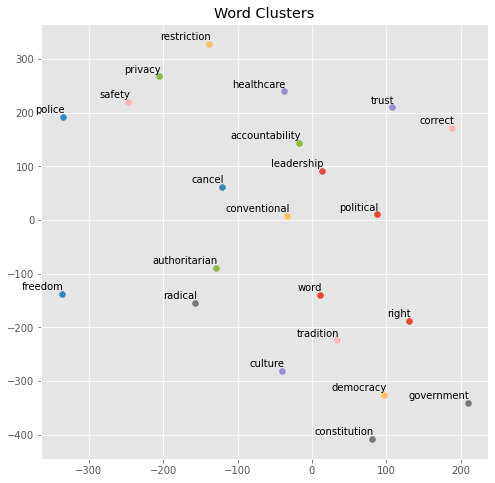

In [ ]:
vocab = ['word', 'freedom', 'trust', 'radical', 'democracy', 'privacy', 'safety',
         'right','police','healthcare','government','restriction','accountability',
         'correct','political','cancel','culture','constitution','conventional',
         'authoritarian','tradition','leadership']

tsne_plot(trump_cbow)

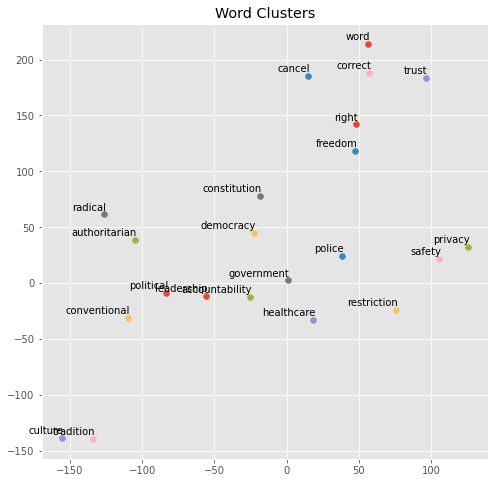

In [ ]:
tsne_plot(trump_sg)